A.I PREDICATION IMPROVE VERSION

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

READ AND EXPLORE DATASET

In [4]:
df = pd.read_csv("student_risk_dataset.csv")
# df.head()
# df.info()
# df.columns
# df.describe()
# df.info()
# df.isnull().sum()

EXPLORATORY DATA ANALYSIS - E.D.A

In [5]:
# df.head()
# df.tail()
# df.shape
# df.describe()
numeric_columns = ['attendance_percentage', 'risk_score', 'avg_score']
# for column in numeric_columns:
#     plt.figure(figsize = (6,4))
#     sns.histplot(df[column],kde=True,bins=20)

# sns.countplot(x=df['fee_status'])
# sns.countplot(x=df['risk_level'])

# for col in numeric_columns:
#     plt.figure(figsize = (6,4))
#     sns.boxplot(x=df[col])

# corr = df.corr(numeric_only=True)
# plt.figure(figsize=(6,4))
# sns.heatmap(corr, annot=True)




#---------------------------------------------------------------------------------------------------------------------------
# merge_table
# count_paid=0
# count_partial=0
# count_overdue=0
# for i in merge_table['fee_status']:
#     if(i =='Paid'):
#         count_paid+=1
#         continue
#     elif(i =='Partial'):
#         count_partial+=1
#         continue
#     else:
#         count_overdue+=1
#         continue
#
# size = [count_paid,count_partial,count_overdue]
# label=['Paid','Partial','Overdue']
# plt.figure(figsize = (10,10))
# plt.pie(size, labels = label, autopct='%1.1f%%',startangle=90)
# plt.title('FEE PIE CHART')
# plt.show()

# df.columns


DATA CLEANING / PREPROCESSING :

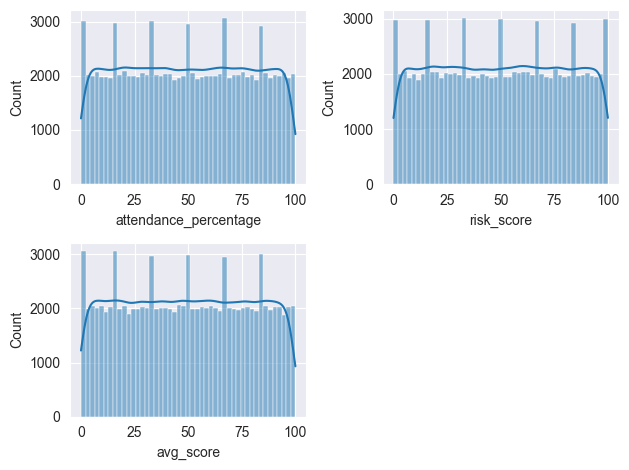

In [6]:
# df.head()
df_cleaned = df.copy()                                   ## copy real dataframe and store in df_cleaned
# df_cleaned.head()
df_cleaned.drop_duplicates( inplace=True)                                    ## drop duplicate rows from dataset
# df_cleaned.isnull().sum()
# df_cleaned.dtypes
df_cleaned['fee_status'].value_counts()
df_cleaned = pd.get_dummies(df_cleaned,columns=['fee_status'],drop_first=False)       ## One hot coding use 3 types value

# df_cleaned['risk_level'].value_counts()
# df_cleaned = pd.get_dummies(df_cleaned,columns=['risk_level'],drop_first=False)    ## One hot coding 3 types value

## label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['risk_level'] = le.fit_transform(df_cleaned['risk_level'])             ## these my target so apply lebel encoding


df_cleaned.drop(columns=['name','student_id'],axis=1, inplace=True)                           ## drop object datatype not useful student_id and name

df_cleaned = df_cleaned.astype(int)                                            ## convert dataframe all columns data type into same int



# df_cleaned.dtypes                                                           ## check all columns data types
# df_cleaned.head()
def plot_hist(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df_cleaned[var],kde=True)

plot_hist("attendance_percentage",1)
plot_hist("risk_score",2)
plot_hist('avg_score',3)
plt.tight_layout()
plt.show()






FEATURE ENGINEERING AND EXTRACTION & SELECTION :

In [7]:
# df_cleaned.head()
# df_cleaned["attendance_category"] = pd.cut(df_cleaned["attendance_percentage"],bins=[-1,74,75,100] , labels=["risk","neutral","low"])
# df_cleaned["attendance_category"] = np.where(df_cleaned['attendance_percentage']<75,"risk",np.where(df_cleaned["attendance_percentage"]==75,"neutral","low"))
df_cleaned["attendance_category"] = np.where(df_cleaned['attendance_percentage']<75,2,np.where(df_cleaned["attendance_percentage"]==75,1,0))
# df_cleaned = pd.get_dummies(df_cleaned,columns = ["attendance_category"],drop_first=False)
# df_cleaned = df_cleaned.astype(int)
# df_cleaned.head()
# df_cleaned.shape
# df_cleaned.columns

## FEATURE SCALING :-
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# cols = ['attendance_percentage', 'risk_score', 'avg_score']
# df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])
# df_cleaned.head()

## FEATURE EXTRACTION :-
# from scipy.stats import pearsonr                       ## pearson correlation calculation
# selected_features = ['attendance_percentage', 'risk_score', 'avg_score']
# correlations = {}
# for f in selected_features:
#     correlations[f] = pearsonr(df_cleaned[f], df_cleaned["risk_level"])[0]                 ## correlatons each input feature against target
#
# correlations

df_cleaned.head()



,attendance_percentage,avg_score,risk_level,risk_score,fee_status_Overdue,fee_status_Paid,fee_status_Partial,attendance_category
0,41,37,2,58,0,1,0,2
1,71,14,0,68,1,0,0,2
2,32,10,2,41,0,1,0,2
3,87,10,2,44,0,1,0,0
4,59,31,0,84,0,1,0,2


M.L MODEL TRAIN AND TEST :-

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score
)
import joblib




X = df_cleaned[['attendance_percentage','avg_score','fee_status_Overdue','fee_status_Partial','fee_status_Paid']]
y = df_cleaned['risk_level']

## Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y   # ✅ keeps uniform class balance
)





TRAIN DECISION TREE CLASSIFIER:-

In [9]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',   # ✅ KEY for uniform data
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
print("✅ Random Forest trained successfully")



✅ Random Forest trained successfully


MODEL EVALUATION-ACCURACY:-

In [10]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.33615
F1 Score (macro): 0.33537835025132395

Classification Report:

              precision    recall  f1-score   support

           0       0.34      0.34      0.34      6916
           1       0.35      0.35      0.35      6963
           2       0.31      0.32      0.31      6121

    accuracy                           0.34     20000
   macro avg       0.34      0.34      0.34     20000
weighted avg       0.34      0.34      0.34     20000


Confusion Matrix:

[[2352 2377 2187]
 [2388 2427 2148]
 [2111 2066 1944]]


CROSS-VALIDATION

In [11]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    rf_model,
    X,
    y,
    cv=cv,
    scoring='f1_macro'
)

print("Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))


Cross-Validation F1 Scores: [0.33490705 0.33114931 0.33549539 0.33881078 0.33764419]
Mean CV F1 Score: 0.3356013455132409


FEATURE IMPORTANCE:-

In [12]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
1,avg_score,0.508412
0,attendance_percentage,0.473777
3,fee_status_Partial,0.006337
4,fee_status_Paid,0.006115
2,fee_status_Overdue,0.005359


VISUALIZE DECISION TREE:-

In [14]:
import joblib

# Save the trained model
joblib.dump(rf_model, "C:\\Users\YUVRAJ\\PycharmProjects\\JupyterProject\\JupyterProject\\A.I -Predication-counselling-system\\student_risk_model.pkl")
print("Model saved successfully!")


Model saved successfully!


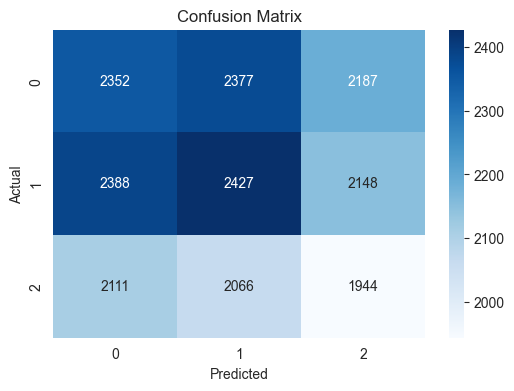

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("C:\\Users\\YUVRAJ\\PycharmProjects\\JupyterProject\\JupyterProject\\A.I -Predication-counselling-system\\confusion_matrix_2.png")
plt.show()


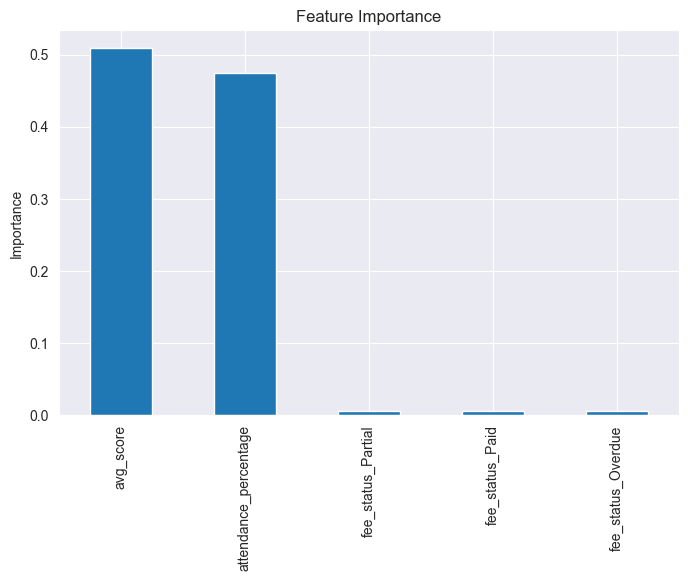

In [16]:
import numpy as np

feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feature_imp.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.savefig("C:\\Users\\YUVRAJ\\PycharmProjects\\JupyterProject\\JupyterProject\\A.I -Predication-counselling-system\\feature_importance_2.png")
plt.show()
